<a href="https://colab.research.google.com/github/shap0011/machine_learning_fall_2024/blob/main/Real_Estate_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib.

First thing, Import all the libraries

In [40]:
# mount to /content/drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [42]:
# next load the data
# df = pd.read_csv('final.csv')
df = pd.read_csv('/content/drive/MyDrive/ML Individual Projects Level 2/Project 1 Regression Models/final.csv')
df.head()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
0,295850,2013,234,81,1,1,584,2013,0,0,0,1,0,0,1
1,216500,2006,169,51,1,1,612,1965,0,1,0,0,41,0,1
2,279900,2012,216,74,1,1,615,1963,0,0,0,1,49,0,1
3,379900,2005,265,92,1,1,618,2000,33541,0,0,0,5,0,1
4,340000,2002,88,30,1,1,634,1992,0,0,0,0,10,0,1


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [43]:
df.tail()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
1858,760000,2008,881,249,5,5,7842,2003,436035,1,0,0,5,1,0
1859,690000,2015,1553,473,5,6,6501,1956,23086,1,0,0,59,1,0
1860,600000,1999,942,287,5,6,7064,1995,217800,1,0,0,4,1,0
1861,759900,2009,803,245,5,6,7500,2006,8886,1,0,0,3,1,0
1862,735000,2015,1459,444,5,6,7515,1958,10497,1,0,0,57,1,0


In [44]:
df.shape

(1863, 15)

## Linear Regression Model

In [45]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [46]:
# seperate input features in x
x = df.drop('price', axis=1)

# store the target variable in y
y = df['price']

In [47]:
x.head()

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
0,2013,234,81,1,1,584,2013,0,0,0,1,0,0,1
1,2006,169,51,1,1,612,1965,0,1,0,0,41,0,1
2,2012,216,74,1,1,615,1963,0,0,0,1,49,0,1
3,2005,265,92,1,1,618,2000,33541,0,0,0,5,0,1
4,2002,88,30,1,1,634,1992,0,0,0,0,10,0,1


In [48]:
y.head()

,price
0,295850
1,216500
2,279900
3,379900
4,340000


**Train Test Split**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [49]:
# import module
from sklearn.model_selection import train_test_split

In [90]:
x_train.property_type_Bunglow.value_counts()

,count
property_type_Bunglow,
1,851
0,639


In [92]:
# Split the dataset
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=x.property_type_Bunglow)

In [93]:
x_train.property_type_Bunglow.value_counts()

,count
property_type_Bunglow,
1,849
0,641


In [51]:
x_train.head()

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
492,2007,244,74,3,2,1452,1968,0,1,0,0,39,0,1
1569,2003,729,212,5,1,2600,1953,12196,1,0,0,50,1,0
265,2010,453,157,2,2,1200,1938,5000,1,1,1,72,1,0
874,2004,368,112,3,3,2376,1983,2474,1,0,0,21,0,1
919,2007,277,78,3,4,1556,2004,1241,1,0,0,3,0,1


In [52]:
y_train

,price
492,330000
1569,570000
265,400000
874,355000
919,335000
...,...
410,325900
500,420000
709,343000
1413,582499


In [53]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1490, 14), (1490,), (373, 14), (373,))

In [54]:
# train your model
model = LinearRegression()
lrmodel = model.fit(x_train, y_train)

In [55]:
lrmodel.coef_

array([ 7.58436518e+03, -4.57819077e+02,  2.33728338e+03,  6.43883419e+03,
        5.92966493e+03,  3.33769545e+01,  4.19764481e+03,  1.28484047e-01,
       -1.27440880e+04, -5.22064799e+03, -4.70480570e+04,  3.38672037e+03,
        9.55927221e+03, -9.55927221e+03])

In [56]:
lrmodel.intercept_

np.float64(-23413723.239999063)

In [57]:
x_train.head(1)

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
492,2007,244,74,3,2,1452,1968,0,1,0,0,39,0,1


In [58]:
# make preditions on train set
train_pred = lrmodel.predict(x_train)

In [59]:
train_pred

array([319731.6774619 , 430136.60600718, 379269.96756135, ...,
       365774.6021251 , 523928.98486756, 405126.95639577])

In [60]:
y_train

,price
492,330000
1569,570000
265,400000
874,355000
919,335000
...,...
410,325900
500,420000
709,343000
1413,582499


In [61]:
# evaluate your model
# we need mean absolute error
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train_pred, y_train)
print('Train error is', train_mae)

Train error is 84643.93503543084


In [ ]:
lrmodel.coef_

array([ 7.92898177e+03, -4.22689266e+02,  2.24606761e+03,  3.64530650e+03,
        7.46225466e+03,  2.81854446e+01,  4.39746517e+03,  1.69254225e-01,
       -1.00734187e+04, -7.90752462e+03, -4.98164171e+04,  3.53151659e+03,
       -2.85853946e+04])

In [ ]:
# make predictions om test set
ypred = lrmodel.predict(x_test)

#evaluate the model
test_mae = mean_absolute_error(ypred, y_test)
print('Test error is', test_mae)

Test error is 82294.70229463307


In [62]:
lrmodel.intercept_

np.float64(-23413723.239999063)

### Our model is still not good beacuse we need a model with Mean Absolute Error < $70,000

Note - We have not scaled the features and not tuned the model.

## Decision Tree Model

In [63]:
# import decision tree model
from sklearn.tree import DecisionTreeRegressor

In [64]:
# create an instance of the class
dt = DecisionTreeRegressor(max_depth=3, max_features=10, random_state=567)

In [67]:
# train the model
dtmodel = dt.fit(x_train,y_train)

In [77]:
# make predictions using the test set
ytrain_pred = dtmodel.predict(x_train)

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

59670.34287589642

In [78]:
# make predictions using the test set
ytest_pred = dtmodel.predict(x_test)

In [79]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

68023.560070401

## How do I know if my model is Overfitting or Generalised?

In [ ]:
# make predictions on train set
ytrain_pred = dtmodel.predict(x_train)

In [ ]:
# import mean absolute error metric
from sklearn.metrics import mean_absolute_error

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

65141.146705895575

## Plot the tree

In [ ]:
# get the features
dtmodel.feature_names_in_

array(['year_sold', 'property_tax', 'insurance', 'beds', 'baths', 'sqft',
       'year_built', 'lot_size', 'basement', 'popular', 'recession',
       'property_age', 'property_type_Condo'], dtype=object)

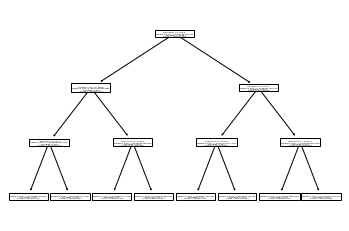

In [ ]:
# plot the tree
from sklearn import tree

# Plot the tree with feature names
tree.plot_tree(dtmodel, feature_names=dtmodel.feature_names_in_)

#tree.plot_tree(dtmodel)
#plt.show(dpi=300)

# Save the plot to a file
plt.savefig('tree.png', dpi=300)

## Random Forest Model

In [ ]:
# import decision tree model
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# create an instance of the model
rf = RandomForestRegressor(n_estimators=200, criterion='absolute_error')

In [ ]:
# train the model
rfmodel = rf.fit(x_train,y_train)

In [ ]:
# make prediction on train set
ytrain_pred = rfmodel.predict(x_train)

In [ ]:
# make predictions on the x_test values
ytest_pred = rfmodel.predict(x_test)

In [ ]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

42766.2177613941

In [ ]:
# Individual Decision Trees
# tree.plot_tree(rfmodel.estimators_[2], feature_names=dtmodel.feature_names_in_)

## Pickle:

* The pickle module implements a powerful algorithm for serializing and de-serializing a Python object structure.

* The saving of data is called Serialization, and loading the data is called De-serialization.

**Pickle** model provides the following functions:
* **`pickle.dump`** to serialize an object hierarchy, you simply use `dump()`.
* **`pickle.load`** to deserialize a data stream, you call the `loads()` function.

In [80]:
# import pickle to save model
import pickle

# Save the trained model on the drive
pickle.dump(dtmodel, open('RE_Model','wb'))

In [81]:
# Load the pickled model
RE_Model = pickle.load(open('RE_Model','rb'))

In [ ]:
# Use the loaded pickled model to make predictions
RE_Model.predict([[2012, 216, 74, 1 , 1, 618, 2000, 600, 1, 0, 0, 6, 0]])

C:\Users\KANGRSW\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


array([258697.91])

In [ ]:
x_test.head(1)

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
266,2013,503,167,2,2,1200,1940,2744,1,1,1,73,1,0
